<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up </B> for Health - Deep Learning </div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote </B>and<b> 🍏 ShowUp </b>helper class</B></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
<ol>
<li><B>Problem statement</B>: A clear description of the problem the project aims to solve.</li><BR>
<li><B>Data source</B>: Information on where the data used in the project is obtained from.</li><BR>
<li><B>Model building</B>: An overview of the model used and the reasoning behind its selection.</li><BR>
 Precision = $\frac{\text{true positives}}{\text{true positives + false positives}}$, Recall = $\frac{\text{true positives}}{\text{true positives + false negatives}}$, F1 = $2 \times \frac{\text{precision} \times \text{recall}}{\text{precision + recall}}$</li><BR><BR>
<li><B>Model evaluation</B>: Evaluation metrics used to assess the performance of the model and results of the evaluation.</li><BR>
<li><B>Conclusion</B>: A summary of the findings and recommendations for further work.</li>
</ol>
</div>

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>wandb.ai Load </B> Athentication</div>

wandb_api_key: `651204c459ad2877b0d32ae2f37ce28d159a9cbe`

In [ ]:
import wandb
wandb.login()

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Libries </B> </div>

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import datetime 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [2]:
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix

''' Imbalanced Classes'''
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf


from showupforhealth.params import *
from showupforhealth.utils import *


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Load dataset </B> Train</div>

In [3]:
data = pd.read_csv(f'{OUTPUT_DATA}/full_train_data.csv')
data.shape

(641578, 45)

In [4]:
data.head()

,Appointment_status,Patient ID,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White,surgery_ECMC,surgery_ECS,surgery_HPVM,surgery_KMC,surgery_SMW,surgery_TCP,surgery_TGP
0,1.0,19580589.0,18.5,0.0,40.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22698.0,0.519419,0.816996,54.0,1.0,18.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,47551135.0,18.6,0.0,70.0,1.0,0.39,0.0,1.0,0.0,1.0,1.0,0.0,0.0,10169.0,0.540792,1.656309,49.0,0.0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,19579593.0,21.5,0.0,66.0,1.0,0.03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8243.0,0.332691,0.600495,37.0,0.0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,19581430.0,19.3,0.0,58.0,0.0,0.11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7626.0,0.155802,0.215224,27.0,0.0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,17407665.0,29.0,0.0,61.0,0.0,0.06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8087.0,0.451039,4.237312,38.0,0.0,30.0,-0.354605,-0.935016,0.707107,-0.707107,-0.5,-0.866025,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.drop(columns=['surgery_ECMC', 'surgery_ECS',
       'surgery_HPVM', 'surgery_KMC', 'surgery_SMW', 'surgery_TCP',
       'surgery_TGP'], inplace=True)

In [6]:
data['Appointment_status'].value_counts(normalize=True)

1.0    0.966833
0.0    0.033167
Name: Appointment_status, dtype: float64

In [7]:
data['Appointment_status'].value_counts(normalize=False)

1.0    620299
0.0     21279
Name: Appointment_status, dtype: int64

In [8]:
# Define X and y
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (641578, 37)
y - dependant variable - Appointment_status: (641578,)


In [9]:
X.drop(columns=['Patient ID'], inplace=True)

In [10]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, val_size=0.2, test_size=0.1)

✅ OUTPUT: X_train, X_val, X_test, y_train, y_val, y_test
Train Set:  X_train, y_train - (449104, 36), (449104,)
  Val Set:  X_val, y_val - - - (128316, 36), (128316,)
 Test Set:  X_test, y_test - - (64158, 36), (64158,)


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>⛔️ Over Sample using SMOTE </B> This STEP WAS LEFT OUT</div>

In [11]:
X_train, y_train = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(477573, 36) y_train_os :(477573,)


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>📡 Random Undersample </B>with Imbalance </div>

In [12]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampler
rus = RandomUnderSampler(sampling_strategy=0.1)

# Fit and transform the data
X_train, y_train = rus.fit_resample(X_train, y_train)

In [13]:
X_train.shape

(477565, 36)

In [14]:
y_train.value_counts()

1.0    434150
0.0     43415
Name: Appointment_status, dtype: int64

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>⚖️ Scale </B> Fit on Train, Transform Train / Val / Test - save scaler to pickle for prediction</div>

In [15]:
#Scale data
# Fit the scaler on the training data
scaler = fit_scaler(X_train, scaler_type='standard')

In [16]:
# Save scaller to Pickle to import in other notebook for prediction
from joblib import dump, load

# ‼️‼️‼️ Save the scaler object do not overide with intermediate saves
dump(scaler, f'{MODEL_OUTPUT}/temp.pkl')

['/Users/janduplessis/code/janduplessis883/data-showup/training_outputs/models/temp.pkl']

In [17]:
# Use the fitted scaler to transform both training and test datasets
X_train = transform_data(X_train, scaler)
X_val = transform_data(X_val, scaler)
X_test = transform_data(X_test, scaler)

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>🧠 Neural Network </B> </div>

In [18]:
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred): # defining a custom F1 score metric
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

metrics = [
    keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
    f1_score,  # adding the custom F1 score metric
#     keras.metrics.TruePositives(name='tp'),
#     keras.metrics.FalsePositives(name='fp'),
#     keras.metrics.TrueNegatives(name='tn'),
#     keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [19]:
import matplotlib.pyplot as plt

def plot_loss_precision_recall_curve(history):
    fig, ax = plt.subplots(4, 2, figsize=(20, 20), constrained_layout=True)
    
    # Plot each metric on a separate subplot
    metrics = ['loss', 'precision', 'recall', 'f1_score', 'auc', 'accuracy']
    val_metrics = ['val_' + m for m in metrics]
    titles = ['Model loss', 'Model precision', 'Model recall', 'Model F1 Score', 'Model AUC', 'Model accuracy']
    y_labels = ['Loss', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Accuracy']
    
    for i, metric in enumerate(metrics):
        ax[i//2, i%2].plot(history.history[metric])
        ax[i//2, i%2].plot(history.history[val_metrics[i]])
        ax[i//2, i%2].set_title(titles[i], fontsize=18)
        ax[i//2, i%2].set_ylabel(y_labels[i], fontsize=14)
        ax[i//2, i%2].legend(['Train', 'Val'], loc='upper left' if 'loss' in metric else 'lower right')
        ax[i//2, i%2].grid(axis="x", linewidth=0.5)
        ax[i//2, i%2].grid(axis="y", linewidth=0.5)

    # Learning Rate Plot
    ax[3, 0].plot(history.history['lr'])
    ax[3, 0].set_title('Model Learning Rate', fontsize=18)
    ax[3, 0].set_ylabel('Learning Rate', fontsize=14)
    ax[3, 0].set_xlabel('Epoch', fontsize=14)
    ax[3, 0].grid(axis="x", linewidth=0.5)
    ax[3, 0].grid(axis="y", linewidth=0.5)

    # Remove the empty subplot (if any)
    if len(metrics) % 2 != 0:
        fig.delaxes(ax[3, 1])

    plt.show()

In [ ]:
import random
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Start a run, tracking hyperparameters
wandb.init(
    settings=wandb.Settings(start_method="thread"),
    # set the wandb project where this run will be logged
    project="ShowUp Weighted Class",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 128,
        "activation_1": "relu",
        "dropout": random.uniform(0.3, 0.8),

        "layer_2": 256,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),

        "layer_3": 256,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        
        "layer_4":64,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        
        "layer_5":32,
        "activation_2": "relu",
        "dropout": random.uniform(0.3, 0.8),
        
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 200,
        "batch_size": 128
    }
)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Normalization
from tensorflow.keras.optimizers import Adam


def init_model():
    # Assuming X_train is globally accessible; otherwise, pass it as a parameter.
    # Only take the dimensions of a single sample, excluding the batch size.
    input_shape = X_train.shape[1:]

    model = models.Sequential()

    # Input layer specifying the shape
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # First Dense layer of size 128
    model.add(layers.Dense(128, activation='relu'))
   # model.add(BatchNormalization())
    random_dropout_rate = np.random.uniform(0.3, 0.8)
    model.add(Dropout(random_dropout_rate))
    
        # First Dense layer of size 128
    model.add(layers.Dense(256, activation='relu'))
   # model.add(BatchNormalization())
    random_dropout_rate = np.random.uniform(0.3, 0.8)
    model.add(Dropout(random_dropout_rate))

        # First Dense layer of size 128
    model.add(layers.Dense(256, activation='relu'))
   # model.add(BatchNormalization())
    random_dropout_rate = np.random.uniform(0.3, 0.8)
    model.add(Dropout(random_dropout_rate))
    
        # First Dense layer of size 128
    model.add(layers.Dense(64, activation='relu'))
  # model.add(BatchNormalization())
    random_dropout_rate = np.random.uniform(0.3, 0.8)
    model.add(Dropout(random_dropout_rate))
    
        # First Dense layer of size 128
    model.add(layers.Dense(32, activation='relu'))
  #  model.add(BatchNormalization())
    random_dropout_rate = np.random.uniform(0.3, 0.8)
    model.add(Dropout(random_dropout_rate))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Define the initial learning rate
    initial_learning_rate = 0.001

    optimizer = Adam(learning_rate=initial_learning_rate)

    # Assuming 'metrics' is defined globally; otherwise, specify it directly or pass it as a parameter.
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

    return model

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>🧠 Simplified Neural Network </B> - To get Loss Function down.</div>

In [66]:
from tensorflow.keras.layers import BatchNormalization, Normalization
from tensorflow.keras.optimizers import Adam


def init_model():
    # Assuming X_train is globally accessible; otherwise, pass it as a parameter.
    # Only take the dimensions of a single sample, excluding the batch size.
    input_shape = X_train.shape[1:]

    model = models.Sequential()

    # Input layer specifying the shape
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # First Dense layer of size 128
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Define the initial learning rate
    initial_learning_rate = 0.001

    optimizer = Adam(learning_rate=initial_learning_rate)

    # Assuming 'metrics' is defined globally; otherwise, specify it directly or pass it as a parameter.
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

    return model

In [67]:
model = init_model()
# model.summary()

In [71]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)

es = EarlyStopping(
    patience=15,
    monitor='val_loss', 
    restore_best_weights=True)

# Compute class weights
num_class_0 = sum(y_train == 0)
num_class_1 = sum(y_train == 1)
total_samples = len(y_train)

# Original weights (you could modify these)
original_weight_for_0 = (1 / num_class_0) * (total_samples) / 2.0 
original_weight_for_1 = (1 / num_class_1) * (total_samples) / 2.0

# Increase the weight for class 0 by a factor
factor = 1.3  # Adjust this factor based on experimentation
weight_for_0 = original_weight_for_0 * factor
weight_for_1 = original_weight_for_1  # You might want to keep this the same or even reduce it

class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1000,
                    batch_size=256, 
                    shuffle=True,
                    verbose=1 
                   )


Epoch 1/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.1039 - cross entropy: 0.1039 - f1_score: 0.9783 - accuracy: 0.9601 - precision: 0.9665 - recall: 0.9905 - auc: 0.9714 - prc: 0.9967 - val_loss: 0.1048 - val_cross entropy: 0.1048 - val_f1_score: 0.9807 - val_accuracy: 0.9623 - val_precision: 0.9723 - val_recall: 0.9892 - val_auc: 0.9067 - val_prc: 0.9960
Epoch 2/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.1031 - cross entropy: 0.1031 - f1_score: 0.9783 - accuracy: 0.9601 - precision: 0.9664 - recall: 0.9906 - auc: 0.9719 - prc: 0.9967 - val_loss: 0.1037 - val_cross entropy: 0.1037 - val_f1_score: 0.9814 - val_accuracy: 0.9636 - val_precision: 0.9712 - val_recall: 0.9918 - val_auc: 0.9053 - val_prc: 0.9958
Epoch 3/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.1023 - cross entropy: 0.1023 - f1_score: 0.9787 - accuracy: 0.9608 - precision: 0.9668 - recall: 0.9909 - auc: 0.9724 - prc: 0.9968 - val_loss: 0.10

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0894 - cross entropy: 0.0894 - f1_score: 0.9813 - accuracy: 0.9658 - precision: 0.9706 - recall: 0.9924 - auc: 0.9783 - prc: 0.9975 - val_loss: 0.1089 - val_cross entropy: 0.1089 - val_f1_score: 0.9807 - val_accuracy: 0.9625 - val_precision: 0.9715 - val_recall: 0.9903 - val_auc: 0.8959 - val_prc: 0.9952
Epoch 44/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0895 - cross entropy: 0.0895 - f1_score: 0.9812 - accuracy: 0.9655 - precision: 0.9704 - recall: 0.9924 - auc: 0.9783 - prc: 0.9974 - val_loss: 0.1093 - val_cross entropy: 0.1093 - val_f1_score: 0.9802 - val_accuracy: 0.9614 - val_precision: 0.9725 - val_recall: 0.9880 - val_auc: 0.8980 - val_prc: 0.9952
Epoch 45/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0891 - cross entropy: 0.0891 - f1_score: 0.9813 - accuracy: 0.9657 - precision: 0.9706 - recall: 0.9922 - auc: 0.9786 - prc: 0.9975 - val_loss: 0.1102 - val_cr

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0852 - cross entropy: 0.0852 - f1_score: 0.9822 - accuracy: 0.9674 - precision: 0.9722 - recall: 0.9925 - auc: 0.9804 - prc: 0.9977 - val_loss: 0.1129 - val_cross entropy: 0.1129 - val_f1_score: 0.9803 - val_accuracy: 0.9617 - val_precision: 0.9724 - val_recall: 0.9884 - val_auc: 0.8898 - val_prc: 0.9947
Epoch 86/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0849 - cross entropy: 0.0849 - f1_score: 0.9822 - accuracy: 0.9674 - precision: 0.9723 - recall: 0.9924 - auc: 0.9804 - prc: 0.9977 - val_loss: 0.1149 - val_cross entropy: 0.1149 - val_f1_score: 0.9802 - val_accuracy: 0.9614 - val_precision: 0.9723 - val_recall: 0.9883 - val_auc: 0.8884 - val_prc: 0.9946
Epoch 87/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0853 - cross entropy: 0.0853 - f1_score: 0.9821 - accuracy: 0.9672 - precision: 0.9721 - recall: 0.9924 - auc: 0.9802 - prc: 0.9976 - val_loss: 0.1123 - val_cr

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0827 - cross entropy: 0.0827 - f1_score: 0.9826 - accuracy: 0.9680 - precision: 0.9729 - recall: 0.9925 - auc: 0.9812 - prc: 0.9977 - val_loss: 0.1185 - val_cross entropy: 0.1185 - val_f1_score: 0.9787 - val_accuracy: 0.9587 - val_precision: 0.9733 - val_recall: 0.9844 - val_auc: 0.8876 - val_prc: 0.9946
Epoch 128/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0828 - cross entropy: 0.0828 - f1_score: 0.9827 - accuracy: 0.9682 - precision: 0.9730 - recall: 0.9926 - auc: 0.9812 - prc: 0.9977 - val_loss: 0.1176 - val_cross entropy: 0.1176 - val_f1_score: 0.9800 - val_accuracy: 0.9610 - val_precision: 0.9726 - val_recall: 0.9876 - val_auc: 0.8823 - val_prc: 0.9940
Epoch 129/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0827 - cross entropy: 0.0827 - f1_score: 0.9827 - accuracy: 0.9682 - precision: 0.9731 - recall: 0.9925 - auc: 0.9813 - prc: 0.9977 - val_loss: 0.1181 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0813 - cross entropy: 0.0813 - f1_score: 0.9829 - accuracy: 0.9687 - precision: 0.9735 - recall: 0.9926 - auc: 0.9819 - prc: 0.9978 - val_loss: 0.1188 - val_cross entropy: 0.1188 - val_f1_score: 0.9790 - val_accuracy: 0.9591 - val_precision: 0.9731 - val_recall: 0.9849 - val_auc: 0.8847 - val_prc: 0.9944
Epoch 170/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0813 - cross entropy: 0.0813 - f1_score: 0.9829 - accuracy: 0.9686 - precision: 0.9735 - recall: 0.9924 - auc: 0.9818 - prc: 0.9978 - val_loss: 0.1196 - val_cross entropy: 0.1196 - val_f1_score: 0.9793 - val_accuracy: 0.9598 - val_precision: 0.9730 - val_recall: 0.9857 - val_auc: 0.8831 - val_prc: 0.9941
Epoch 171/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0813 - cross entropy: 0.0813 - f1_score: 0.9829 - accuracy: 0.9687 - precision: 0.9736 - recall: 0.9925 - auc: 0.9819 - prc: 0.9978 - val_loss: 0.1207 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0803 - cross entropy: 0.0803 - f1_score: 0.9832 - accuracy: 0.9693 - precision: 0.9741 - recall: 0.9926 - auc: 0.9821 - prc: 0.9978 - val_loss: 0.1198 - val_cross entropy: 0.1198 - val_f1_score: 0.9799 - val_accuracy: 0.9608 - val_precision: 0.9726 - val_recall: 0.9873 - val_auc: 0.8782 - val_prc: 0.9938
Epoch 212/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0803 - cross entropy: 0.0803 - f1_score: 0.9831 - accuracy: 0.9691 - precision: 0.9738 - recall: 0.9927 - auc: 0.9823 - prc: 0.9979 - val_loss: 0.1174 - val_cross entropy: 0.1174 - val_f1_score: 0.9813 - val_accuracy: 0.9635 - val_precision: 0.9715 - val_recall: 0.9913 - val_auc: 0.8769 - val_prc: 0.9935
Epoch 213/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0802 - cross entropy: 0.0802 - f1_score: 0.9831 - accuracy: 0.9691 - precision: 0.9739 - recall: 0.9925 - auc: 0.9823 - prc: 0.9979 - val_loss: 0.1192 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0794 - cross entropy: 0.0794 - f1_score: 0.9833 - accuracy: 0.9694 - precision: 0.9743 - recall: 0.9925 - auc: 0.9826 - prc: 0.9979 - val_loss: 0.1200 - val_cross entropy: 0.1200 - val_f1_score: 0.9804 - val_accuracy: 0.9617 - val_precision: 0.9721 - val_recall: 0.9888 - val_auc: 0.8772 - val_prc: 0.9936
Epoch 254/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0793 - cross entropy: 0.0793 - f1_score: 0.9834 - accuracy: 0.9696 - precision: 0.9743 - recall: 0.9927 - auc: 0.9826 - prc: 0.9979 - val_loss: 0.1202 - val_cross entropy: 0.1202 - val_f1_score: 0.9796 - val_accuracy: 0.9603 - val_precision: 0.9722 - val_recall: 0.9872 - val_auc: 0.8791 - val_prc: 0.9938
Epoch 255/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0794 - cross entropy: 0.0794 - f1_score: 0.9834 - accuracy: 0.9695 - precision: 0.9743 - recall: 0.9927 - auc: 0.9825 - prc: 0.9979 - val_loss: 0.1197 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0787 - cross entropy: 0.0787 - f1_score: 0.9835 - accuracy: 0.9697 - precision: 0.9746 - recall: 0.9925 - auc: 0.9828 - prc: 0.9979 - val_loss: 0.1200 - val_cross entropy: 0.1200 - val_f1_score: 0.9792 - val_accuracy: 0.9596 - val_precision: 0.9731 - val_recall: 0.9855 - val_auc: 0.8818 - val_prc: 0.9940
Epoch 296/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0786 - cross entropy: 0.0786 - f1_score: 0.9835 - accuracy: 0.9698 - precision: 0.9747 - recall: 0.9926 - auc: 0.9828 - prc: 0.9979 - val_loss: 0.1217 - val_cross entropy: 0.1217 - val_f1_score: 0.9786 - val_accuracy: 0.9585 - val_precision: 0.9731 - val_recall: 0.9842 - val_auc: 0.8808 - val_prc: 0.9940
Epoch 297/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0785 - cross entropy: 0.0785 - f1_score: 0.9835 - accuracy: 0.9699 - precision: 0.9747 - recall: 0.9927 - auc: 0.9828 - prc: 0.9979 - val_loss: 0.1243 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0781 - cross entropy: 0.0781 - f1_score: 0.9836 - accuracy: 0.9699 - precision: 0.9748 - recall: 0.9926 - auc: 0.9830 - prc: 0.9979 - val_loss: 0.1219 - val_cross entropy: 0.1219 - val_f1_score: 0.9798 - val_accuracy: 0.9607 - val_precision: 0.9721 - val_recall: 0.9877 - val_auc: 0.8756 - val_prc: 0.9935
Epoch 338/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0783 - cross entropy: 0.0783 - f1_score: 0.9836 - accuracy: 0.9700 - precision: 0.9747 - recall: 0.9928 - auc: 0.9830 - prc: 0.9979 - val_loss: 0.1215 - val_cross entropy: 0.1215 - val_f1_score: 0.9791 - val_accuracy: 0.9593 - val_precision: 0.9726 - val_recall: 0.9857 - val_auc: 0.8794 - val_prc: 0.9939
Epoch 339/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0782 - cross entropy: 0.0782 - f1_score: 0.9836 - accuracy: 0.9699 - precision: 0.9747 - recall: 0.9927 - auc: 0.9831 - prc: 0.9979 - val_loss: 0.1218 - val_

1866/1866 [==============================] - 2s 994us/step - loss: 0.0776 - cross entropy: 0.0776 - f1_score: 0.9838 - accuracy: 0.9704 - precision: 0.9751 - recall: 0.9927 - auc: 0.9833 - prc: 0.9980 - val_loss: 0.1230 - val_cross entropy: 0.1230 - val_f1_score: 0.9805 - val_accuracy: 0.9619 - val_precision: 0.9717 - val_recall: 0.9894 - val_auc: 0.8727 - val_prc: 0.9932
Epoch 380/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0776 - cross entropy: 0.0776 - f1_score: 0.9837 - accuracy: 0.9702 - precision: 0.9750 - recall: 0.9927 - auc: 0.9833 - prc: 0.9980 - val_loss: 0.1235 - val_cross entropy: 0.1235 - val_f1_score: 0.9793 - val_accuracy: 0.9597 - val_precision: 0.9725 - val_recall: 0.9861 - val_auc: 0.8773 - val_prc: 0.9937
Epoch 381/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0777 - cross entropy: 0.0777 - f1_score: 0.9838 - accuracy: 0.9703 - precision: 0.9750 - recall: 0.9927 - auc: 0.9831 - prc: 0.9979 - val_loss: 0.1226 - va

1866/1866 [==============================] - 2s 972us/step - loss: 0.0773 - cross entropy: 0.0773 - f1_score: 0.9838 - accuracy: 0.9703 - precision: 0.9751 - recall: 0.9926 - auc: 0.9834 - prc: 0.9980 - val_loss: 0.1227 - val_cross entropy: 0.1227 - val_f1_score: 0.9802 - val_accuracy: 0.9615 - val_precision: 0.9724 - val_recall: 0.9883 - val_auc: 0.8735 - val_prc: 0.9933
Epoch 422/1000
1866/1866 [==============================] - 2s 970us/step - loss: 0.0771 - cross entropy: 0.0771 - f1_score: 0.9839 - accuracy: 0.9705 - precision: 0.9753 - recall: 0.9927 - auc: 0.9835 - prc: 0.9980 - val_loss: 0.1221 - val_cross entropy: 0.1221 - val_f1_score: 0.9792 - val_accuracy: 0.9595 - val_precision: 0.9734 - val_recall: 0.9851 - val_auc: 0.8787 - val_prc: 0.9938
Epoch 423/1000
1866/1866 [==============================] - 2s 970us/step - loss: 0.0771 - cross entropy: 0.0771 - f1_score: 0.9839 - accuracy: 0.9704 - precision: 0.9753 - recall: 0.9926 - auc: 0.9834 - prc: 0.9979 - val_loss: 0.1207 

1866/1866 [==============================] - 2s 972us/step - loss: 0.0768 - cross entropy: 0.0768 - f1_score: 0.9839 - accuracy: 0.9705 - precision: 0.9754 - recall: 0.9925 - auc: 0.9834 - prc: 0.9979 - val_loss: 0.1270 - val_cross entropy: 0.1270 - val_f1_score: 0.9779 - val_accuracy: 0.9570 - val_precision: 0.9731 - val_recall: 0.9828 - val_auc: 0.8778 - val_prc: 0.9939
Epoch 464/1000
1866/1866 [==============================] - 2s 983us/step - loss: 0.0769 - cross entropy: 0.0769 - f1_score: 0.9839 - accuracy: 0.9705 - precision: 0.9753 - recall: 0.9927 - auc: 0.9836 - prc: 0.9980 - val_loss: 0.1248 - val_cross entropy: 0.1248 - val_f1_score: 0.9791 - val_accuracy: 0.9593 - val_precision: 0.9729 - val_recall: 0.9854 - val_auc: 0.8760 - val_prc: 0.9935
Epoch 465/1000
1866/1866 [==============================] - 2s 970us/step - loss: 0.0770 - cross entropy: 0.0770 - f1_score: 0.9838 - accuracy: 0.9703 - precision: 0.9753 - recall: 0.9925 - auc: 0.9835 - prc: 0.9980 - val_loss: 0.1239 

1866/1866 [==============================] - 2s 974us/step - loss: 0.0767 - cross entropy: 0.0767 - f1_score: 0.9839 - accuracy: 0.9704 - precision: 0.9754 - recall: 0.9926 - auc: 0.9836 - prc: 0.9980 - val_loss: 0.1220 - val_cross entropy: 0.1220 - val_f1_score: 0.9800 - val_accuracy: 0.9611 - val_precision: 0.9723 - val_recall: 0.9879 - val_auc: 0.8734 - val_prc: 0.9933
Epoch 506/1000
1866/1866 [==============================] - 2s 971us/step - loss: 0.0768 - cross entropy: 0.0768 - f1_score: 0.9840 - accuracy: 0.9706 - precision: 0.9754 - recall: 0.9927 - auc: 0.9836 - prc: 0.9980 - val_loss: 0.1256 - val_cross entropy: 0.1256 - val_f1_score: 0.9799 - val_accuracy: 0.9608 - val_precision: 0.9722 - val_recall: 0.9876 - val_auc: 0.8715 - val_prc: 0.9932
Epoch 507/1000
1866/1866 [==============================] - 2s 969us/step - loss: 0.0766 - cross entropy: 0.0766 - f1_score: 0.9838 - accuracy: 0.9704 - precision: 0.9753 - recall: 0.9925 - auc: 0.9837 - prc: 0.9980 - val_loss: 0.1245 

1866/1866 [==============================] - 2s 971us/step - loss: 0.0764 - cross entropy: 0.0764 - f1_score: 0.9839 - accuracy: 0.9705 - precision: 0.9753 - recall: 0.9927 - auc: 0.9837 - prc: 0.9980 - val_loss: 0.1264 - val_cross entropy: 0.1264 - val_f1_score: 0.9791 - val_accuracy: 0.9595 - val_precision: 0.9723 - val_recall: 0.9861 - val_auc: 0.8748 - val_prc: 0.9935
Epoch 548/1000
1866/1866 [==============================] - 2s 972us/step - loss: 0.0763 - cross entropy: 0.0763 - f1_score: 0.9839 - accuracy: 0.9706 - precision: 0.9755 - recall: 0.9925 - auc: 0.9838 - prc: 0.9980 - val_loss: 0.1261 - val_cross entropy: 0.1261 - val_f1_score: 0.9793 - val_accuracy: 0.9598 - val_precision: 0.9730 - val_recall: 0.9857 - val_auc: 0.8740 - val_prc: 0.9934
Epoch 549/1000
1866/1866 [==============================] - 2s 973us/step - loss: 0.0762 - cross entropy: 0.0762 - f1_score: 0.9840 - accuracy: 0.9707 - precision: 0.9754 - recall: 0.9928 - auc: 0.9838 - prc: 0.9980 - val_loss: 0.1323 

1866/1866 [==============================] - 2s 984us/step - loss: 0.0760 - cross entropy: 0.0760 - f1_score: 0.9840 - accuracy: 0.9707 - precision: 0.9756 - recall: 0.9926 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1250 - val_cross entropy: 0.1250 - val_f1_score: 0.9798 - val_accuracy: 0.9606 - val_precision: 0.9723 - val_recall: 0.9874 - val_auc: 0.8726 - val_prc: 0.9933
Epoch 590/1000
1866/1866 [==============================] - 2s 966us/step - loss: 0.0759 - cross entropy: 0.0759 - f1_score: 0.9841 - accuracy: 0.9709 - precision: 0.9756 - recall: 0.9928 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1282 - val_cross entropy: 0.1282 - val_f1_score: 0.9788 - val_accuracy: 0.9587 - val_precision: 0.9733 - val_recall: 0.9843 - val_auc: 0.8731 - val_prc: 0.9933
Epoch 591/1000
1866/1866 [==============================] - 2s 965us/step - loss: 0.0760 - cross entropy: 0.0760 - f1_score: 0.9841 - accuracy: 0.9708 - precision: 0.9757 - recall: 0.9927 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1339 

1866/1866 [==============================] - 2s 979us/step - loss: 0.0759 - cross entropy: 0.0759 - f1_score: 0.9841 - accuracy: 0.9710 - precision: 0.9758 - recall: 0.9927 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1315 - val_cross entropy: 0.1315 - val_f1_score: 0.9770 - val_accuracy: 0.9555 - val_precision: 0.9741 - val_recall: 0.9800 - val_auc: 0.8790 - val_prc: 0.9939
Epoch 632/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0758 - cross entropy: 0.0758 - f1_score: 0.9841 - accuracy: 0.9709 - precision: 0.9757 - recall: 0.9927 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1305 - val_cross entropy: 0.1305 - val_f1_score: 0.9786 - val_accuracy: 0.9584 - val_precision: 0.9732 - val_recall: 0.9841 - val_auc: 0.8742 - val_prc: 0.9934
Epoch 633/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0758 - cross entropy: 0.0758 - f1_score: 0.9842 - accuracy: 0.9710 - precision: 0.9758 - recall: 0.9927 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1271 - va

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0755 - cross entropy: 0.0755 - f1_score: 0.9841 - accuracy: 0.9709 - precision: 0.9758 - recall: 0.9926 - auc: 0.9842 - prc: 0.9981 - val_loss: 0.1298 - val_cross entropy: 0.1298 - val_f1_score: 0.9784 - val_accuracy: 0.9580 - val_precision: 0.9733 - val_recall: 0.9835 - val_auc: 0.8732 - val_prc: 0.9934
Epoch 674/1000
1866/1866 [==============================] - 2s 995us/step - loss: 0.0758 - cross entropy: 0.0758 - f1_score: 0.9840 - accuracy: 0.9708 - precision: 0.9757 - recall: 0.9926 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1281 - val_cross entropy: 0.1281 - val_f1_score: 0.9794 - val_accuracy: 0.9599 - val_precision: 0.9725 - val_recall: 0.9864 - val_auc: 0.8723 - val_prc: 0.9933
Epoch 675/1000
1866/1866 [==============================] - 2s 996us/step - loss: 0.0757 - cross entropy: 0.0757 - f1_score: 0.9841 - accuracy: 0.9709 - precision: 0.9757 - recall: 0.9927 - auc: 0.9839 - prc: 0.9980 - val_loss: 0.1279 - 

1866/1866 [==============================] - 2s 974us/step - loss: 0.0754 - cross entropy: 0.0754 - f1_score: 0.9842 - accuracy: 0.9712 - precision: 0.9760 - recall: 0.9927 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1270 - val_cross entropy: 0.1270 - val_f1_score: 0.9803 - val_accuracy: 0.9616 - val_precision: 0.9721 - val_recall: 0.9887 - val_auc: 0.8720 - val_prc: 0.9932
Epoch 716/1000
1866/1866 [==============================] - 2s 972us/step - loss: 0.0754 - cross entropy: 0.0754 - f1_score: 0.9842 - accuracy: 0.9711 - precision: 0.9759 - recall: 0.9927 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1290 - val_cross entropy: 0.1290 - val_f1_score: 0.9801 - val_accuracy: 0.9613 - val_precision: 0.9721 - val_recall: 0.9883 - val_auc: 0.8679 - val_prc: 0.9928
Epoch 717/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0753 - cross entropy: 0.0753 - f1_score: 0.9842 - accuracy: 0.9711 - precision: 0.9759 - recall: 0.9928 - auc: 0.9840 - prc: 0.9980 - val_loss: 0.1330 - 

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0753 - cross entropy: 0.0753 - f1_score: 0.9842 - accuracy: 0.9712 - precision: 0.9760 - recall: 0.9927 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1308 - val_cross entropy: 0.1308 - val_f1_score: 0.9799 - val_accuracy: 0.9608 - val_precision: 0.9720 - val_recall: 0.9879 - val_auc: 0.8661 - val_prc: 0.9928
Epoch 758/1000
1866/1866 [==============================] - 2s 975us/step - loss: 0.0753 - cross entropy: 0.0753 - f1_score: 0.9842 - accuracy: 0.9711 - precision: 0.9760 - recall: 0.9927 - auc: 0.9840 - prc: 0.9980 - val_loss: 0.1277 - val_cross entropy: 0.1277 - val_f1_score: 0.9793 - val_accuracy: 0.9598 - val_precision: 0.9725 - val_recall: 0.9864 - val_auc: 0.8725 - val_prc: 0.9933
Epoch 759/1000
1866/1866 [==============================] - 2s 962us/step - loss: 0.0753 - cross entropy: 0.0753 - f1_score: 0.9841 - accuracy: 0.9709 - precision: 0.9758 - recall: 0.9926 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1306 - 

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0752 - cross entropy: 0.0752 - f1_score: 0.9842 - accuracy: 0.9712 - precision: 0.9759 - recall: 0.9928 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1316 - val_cross entropy: 0.1316 - val_f1_score: 0.9777 - val_accuracy: 0.9567 - val_precision: 0.9738 - val_recall: 0.9817 - val_auc: 0.8763 - val_prc: 0.9936
Epoch 800/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0753 - cross entropy: 0.0753 - f1_score: 0.9843 - accuracy: 0.9712 - precision: 0.9760 - recall: 0.9927 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1322 - val_cross entropy: 0.1322 - val_f1_score: 0.9772 - val_accuracy: 0.9558 - val_precision: 0.9739 - val_recall: 0.9806 - val_auc: 0.8761 - val_prc: 0.9937
Epoch 801/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0751 - cross entropy: 0.0751 - f1_score: 0.9842 - accuracy: 0.9711 - precision: 0.9759 - recall: 0.9927 - auc: 0.9840 - prc: 0.9980 - val_loss: 0.1323 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0751 - cross entropy: 0.0751 - f1_score: 0.9842 - accuracy: 0.9712 - precision: 0.9760 - recall: 0.9926 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1303 - val_cross entropy: 0.1303 - val_f1_score: 0.9790 - val_accuracy: 0.9592 - val_precision: 0.9733 - val_recall: 0.9849 - val_auc: 0.8718 - val_prc: 0.9932
Epoch 842/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0751 - cross entropy: 0.0751 - f1_score: 0.9843 - accuracy: 0.9713 - precision: 0.9761 - recall: 0.9927 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1287 - val_cross entropy: 0.1287 - val_f1_score: 0.9796 - val_accuracy: 0.9603 - val_precision: 0.9731 - val_recall: 0.9862 - val_auc: 0.8728 - val_prc: 0.9933
Epoch 843/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0750 - cross entropy: 0.0750 - f1_score: 0.9843 - accuracy: 0.9713 - precision: 0.9760 - recall: 0.9928 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1329 - val_

1866/1866 [==============================] - 2s 978us/step - loss: 0.0748 - cross entropy: 0.0748 - f1_score: 0.9843 - accuracy: 0.9713 - precision: 0.9761 - recall: 0.9927 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1319 - val_cross entropy: 0.1319 - val_f1_score: 0.9797 - val_accuracy: 0.9604 - val_precision: 0.9722 - val_recall: 0.9873 - val_auc: 0.8675 - val_prc: 0.9929
Epoch 884/1000
1866/1866 [==============================] - 2s 971us/step - loss: 0.0748 - cross entropy: 0.0748 - f1_score: 0.9844 - accuracy: 0.9715 - precision: 0.9762 - recall: 0.9928 - auc: 0.9840 - prc: 0.9980 - val_loss: 0.1337 - val_cross entropy: 0.1337 - val_f1_score: 0.9777 - val_accuracy: 0.9568 - val_precision: 0.9737 - val_recall: 0.9819 - val_auc: 0.8737 - val_prc: 0.9935
Epoch 885/1000
1866/1866 [==============================] - 2s 977us/step - loss: 0.0749 - cross entropy: 0.0749 - f1_score: 0.9844 - accuracy: 0.9714 - precision: 0.9762 - recall: 0.9928 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1310 

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0748 - cross entropy: 0.0748 - f1_score: 0.9843 - accuracy: 0.9713 - precision: 0.9762 - recall: 0.9927 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1330 - val_cross entropy: 0.1330 - val_f1_score: 0.9791 - val_accuracy: 0.9595 - val_precision: 0.9728 - val_recall: 0.9857 - val_auc: 0.8693 - val_prc: 0.9930
Epoch 926/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0748 - cross entropy: 0.0748 - f1_score: 0.9844 - accuracy: 0.9715 - precision: 0.9762 - recall: 0.9928 - auc: 0.9842 - prc: 0.9980 - val_loss: 0.1325 - val_cross entropy: 0.1325 - val_f1_score: 0.9798 - val_accuracy: 0.9607 - val_precision: 0.9727 - val_recall: 0.9870 - val_auc: 0.8689 - val_prc: 0.9929
Epoch 927/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0747 - cross entropy: 0.0747 - f1_score: 0.9844 - accuracy: 0.9714 - precision: 0.9762 - recall: 0.9928 - auc: 0.9843 - prc: 0.9980 - val_loss: 0.1319 - val_

1866/1866 [==============================] - 2s 1ms/step - loss: 0.0746 - cross entropy: 0.0746 - f1_score: 0.9843 - accuracy: 0.9713 - precision: 0.9762 - recall: 0.9927 - auc: 0.9843 - prc: 0.9981 - val_loss: 0.1322 - val_cross entropy: 0.1322 - val_f1_score: 0.9781 - val_accuracy: 0.9575 - val_precision: 0.9734 - val_recall: 0.9829 - val_auc: 0.8745 - val_prc: 0.9935
Epoch 968/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0745 - cross entropy: 0.0745 - f1_score: 0.9845 - accuracy: 0.9716 - precision: 0.9763 - recall: 0.9928 - auc: 0.9841 - prc: 0.9980 - val_loss: 0.1345 - val_cross entropy: 0.1345 - val_f1_score: 0.9783 - val_accuracy: 0.9579 - val_precision: 0.9739 - val_recall: 0.9828 - val_auc: 0.8751 - val_prc: 0.9934
Epoch 969/1000
1866/1866 [==============================] - 2s 1ms/step - loss: 0.0747 - cross entropy: 0.0747 - f1_score: 0.9844 - accuracy: 0.9715 - precision: 0.9763 - recall: 0.9927 - auc: 0.9844 - prc: 0.9981 - val_loss: 0.1311 - val_

Weight & Bias Finish 

In [72]:
#wandb.finish()

KeyError: 'lr'

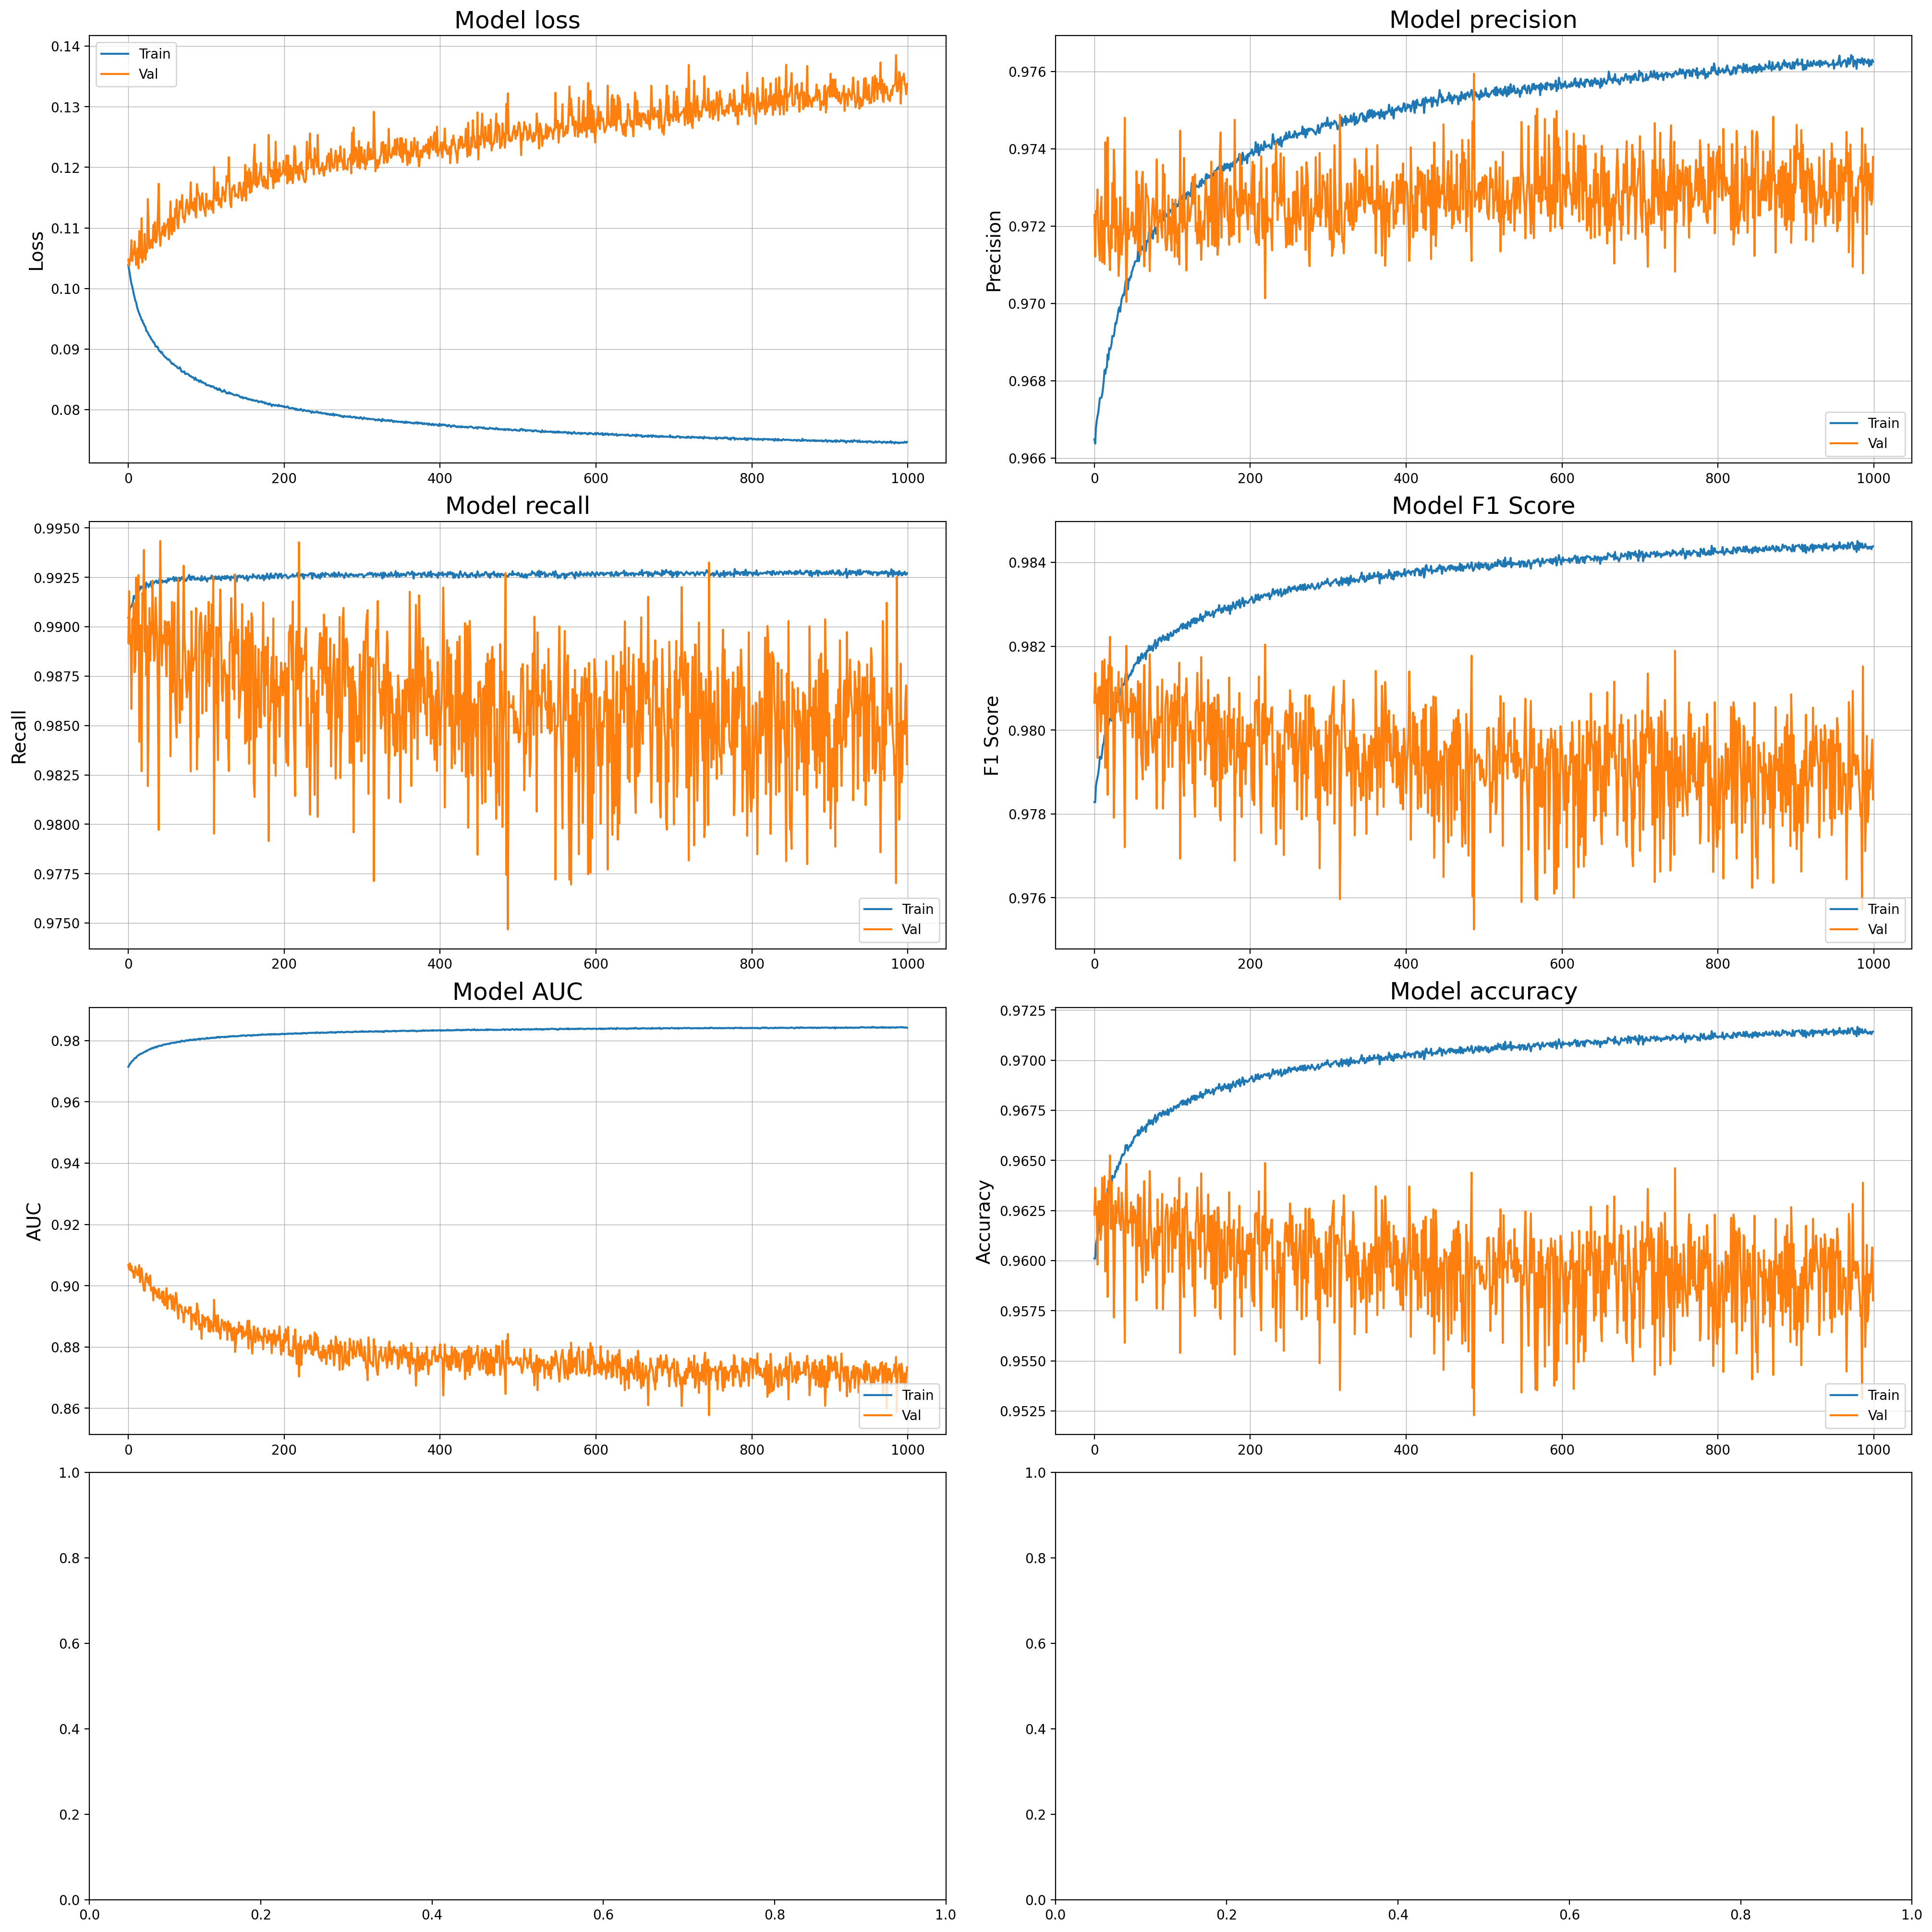

In [73]:
plot_loss_precision_recall_curve(history)

<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>💯 Score Model </B>- on unseen data</div>

In [74]:
model.predict(X_test)

2005/2005 [==============================] - 1s 283us/step


array([[0.9986212 ],
       [0.2287232 ],
       [0.9889398 ],
       ...,
       [0.9994273 ],
       [1.        ],
       [0.89744395]], dtype=float32)

In [75]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True)

{'loss': 0.13316231966018677,
 'cross entropy': 0.13316231966018677,
 'f1_score': 0.978299081325531,
 'accuracy': 0.958415150642395,
 'precision': 0.9734961986541748,
 'recall': 0.9837877750396729,
 'auc': 0.8742530345916748,
 'prc': 0.993424117565155}

In [76]:
from datetime import datetime

now = datetime.now()
datetime_string = now.strftime("%Y-%m-%d %H-%M-%S")

# ‼️‼️‼️ Do not overide saved model with intermediate saves
model.save(f'{MODEL_OUTPUT}/temp.h5') 

In [77]:
y_pred_proba = model.predict(X_test)

2005/2005 [==============================] - 1s 280us/step


<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 12px; border-radius:15px; font-size:16px;'><B>Confusion Matrix </B> Adjust Threshold</div>

In [78]:
threshold = 0.50 # 50% 

y_pred_binary = np.where(y_pred_proba > threshold, 1, 0 )

In [79]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_binary)
cm

array([[  444,  1662],
       [ 1006, 61046]])

Text(0.5, 25.722222222222214, 'Predicted label')

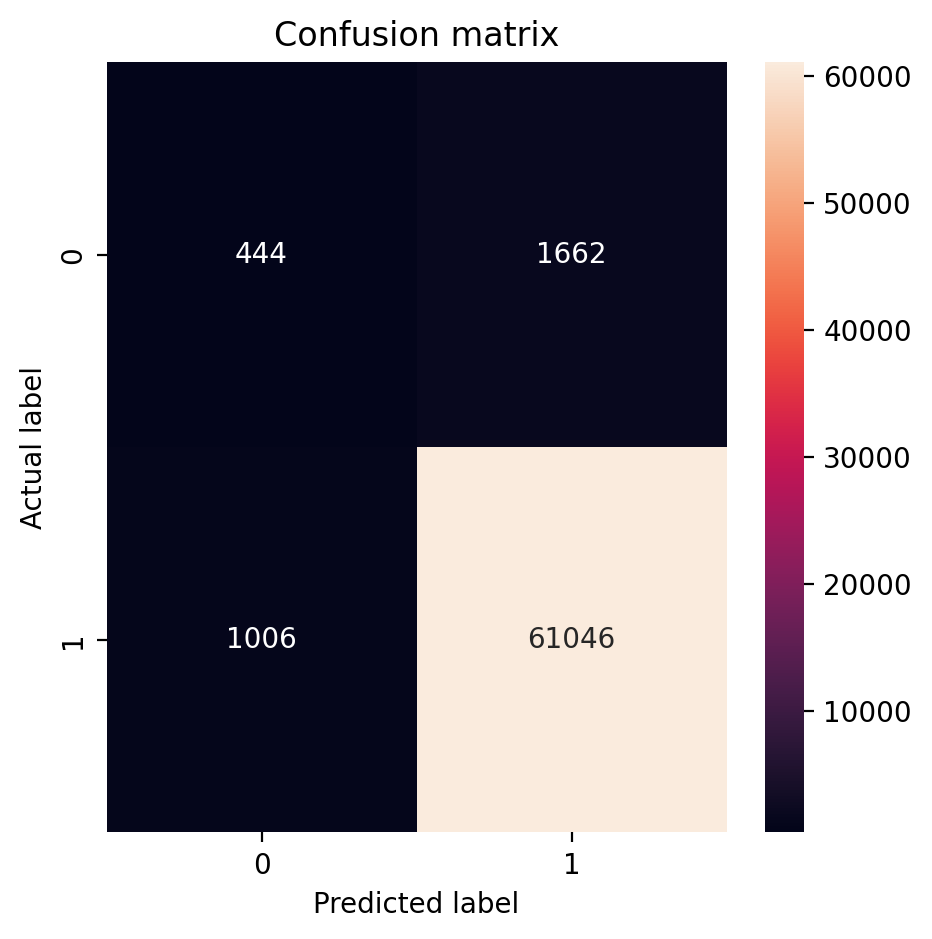

In [80]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.35      0.18      0.24      2106
         1.0       0.97      0.99      0.98     62052

    accuracy                           0.96     64158
   macro avg       0.66      0.58      0.61     64158
weighted avg       0.95      0.96      0.96     64158



In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)
    plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
plot_prc("Test", y_test, y_pred_proba, linestyle='--')
plt.legend(loc='lower right')